In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 탐색적 데이터 분석(EDA)
- 관심 있는 컬럼을 추출하여 데이터 시각화
- 시각화 자료를 보고 인사이트를 추출하는 훈련 필요

In [2]:
df = pd.read_csv('test1_modified_5.csv')

In [3]:
# 분석에 사용할 컬럼 선택(feature, label 성향 판단)
columns = ['year', 'month', 'day', 'hour', 'dayofweek', 'windforce', 'discomfort', # features
           'regular', 'casual', 'group'] # labels

df[columns].to_csv('test1_modified_6.csv', index=False)

In [4]:
df = pd.read_csv('test1_modified_6.csv')
df.head()

,year,month,day,hour,dayofweek,windforce,discomfort,regular,casual,group
0,2017,1,1,0,6,0,0,63.0,13.0,1.0
1,2017,1,1,1,6,0,0,55.0,21.0,0.0
2,2017,1,1,2,6,0,0,38.0,19.0,0.0
3,2017,1,1,3,6,0,0,22.0,12.0,0.0
4,2017,1,1,4,6,0,0,16.0,7.0,0.0


#### 연도별 이용량 추세

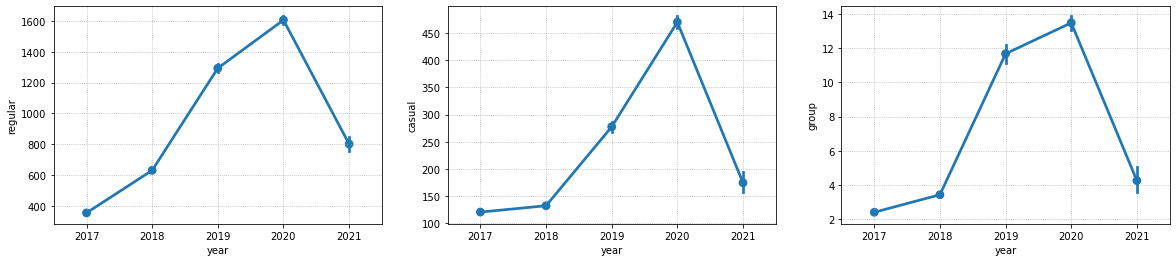

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

for i, user_type in enumerate(['regular', 'casual', 'group']):
    sns.pointplot(data=df, x='year', y=user_type, ax=axes[i])
    axes[i].grid(linestyle=':')

#### 월별 이용량 추세

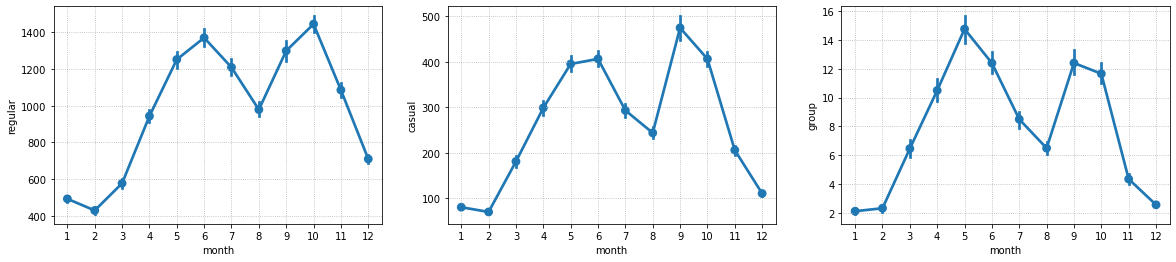

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
# axes = axes.flatten()


for i, user_type in enumerate(['regular', 'casual', 'group']):
    sns.pointplot(data=df, x='month', y=user_type, ax=axes[i])
    axes[i].grid(linestyle=':')

# 겨울에 이용량이 적고, 너무 더울 때에도 이용량 감소

#### 시간대별 이용량 추세

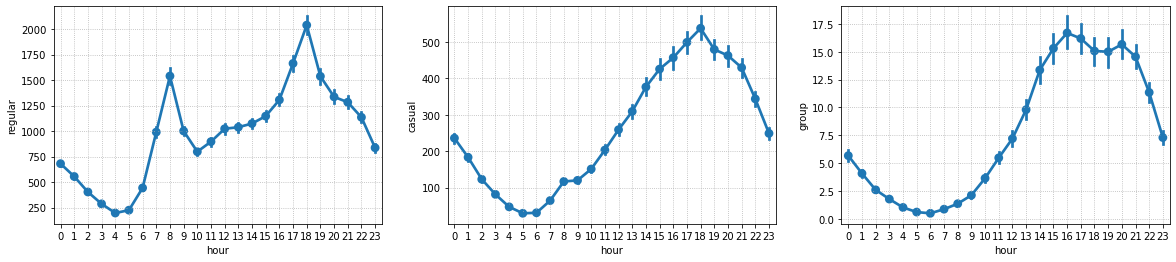

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

for i, user_type in enumerate(['regular', 'casual', 'group']):
    sns.pointplot(data=df, x='hour', y=user_type, ax=axes[i])
    axes[i].grid(linestyle=':')

# 정기권 고객의 경우 주기적으로 출퇴근에 자전거를 이용 -> 출퇴근 시간에 이용량 증가
# 고객 유형별 시간에 따른 이용량 추세가 다르게 나타날 가능성 존재

### 시각화 예시
- 정기권 고객의 연도별/월별 이용량 비교
 - x = year/month
 - y = regular
- 정기권/일일권 고객의 시간대별 이용량 비교
 - x = hour
 - y = regular/casual

<AxesSubplot:xlabel='hour', ylabel='casual'>

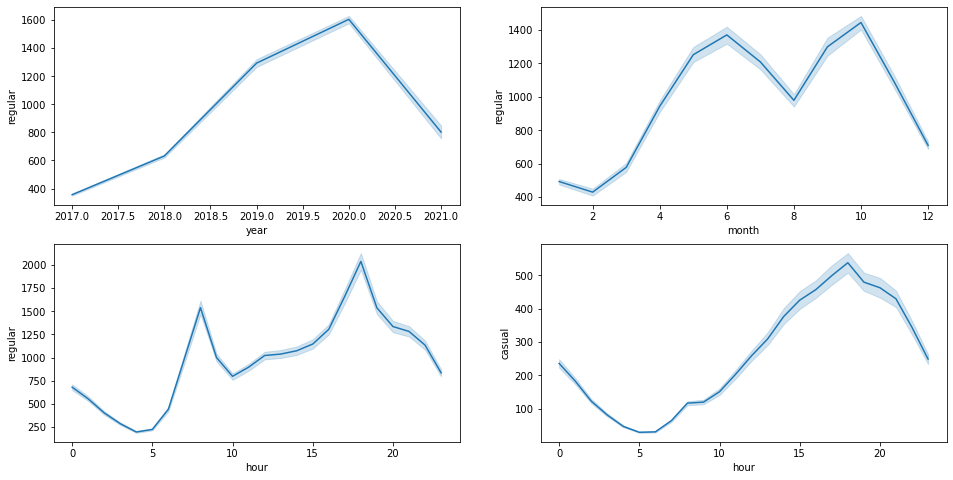

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten() # axes 인덱스 1차원 변환

# 정기권 고객의 연도별/월별 이용량 비교
sns.lineplot(data=df, x='year', y='regular', ax=axes[0])
sns.lineplot(data=df, x='month', y='regular', ax=axes[1])

# 정기권/일일권 고객의 시간대별 이용량 비교
sns.lineplot(data=df, x='hour', y='regular', ax=axes[2])
sns.lineplot(data=df, x='hour', y='casual', ax=axes[3])

In [13]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# fig.set_size_inches(16, 8)

# sns.lineplot(data=df, x='year', y='regular', ax=ax1)
# sns.lineplot(data=df, x='month', y='regular', ax=ax2)
# sns.lineplot(data=df, x='hour', y='regular', ax=ax3)
# sns.lineplot(data=df, x='hour', y='casual', ax=ax4)

### weekend 변수 생성

#### 평일/주말에 따른 구분
- 정기권 고객의 연도별 이용량 차이가 평일/주말에 따라 다른 경향을 보이는가?
- 정기권/일일권 고객의 시간대별 이용량이 평일/주말에 따라 다른 경향을 보이는가?
 - 정기권 고객은 평일 이용량이 많은 반면, 일일권 고객은 평일에 비해 주말 이용량이 많을 것이라고 예측

#### 연도에 따른 구분
- 정기권 고객의 월별 이용량이 연도에 따라 다른 경향을 보이는가?

In [14]:
# 주말을 나타내는 weekend 컬럼 생성(dayofweek 활용)
df['weekend'] = 0
df.loc[df['dayofweek'] > 4, 'weekend'] = 1

<AxesSubplot:xlabel='hour', ylabel='casual'>

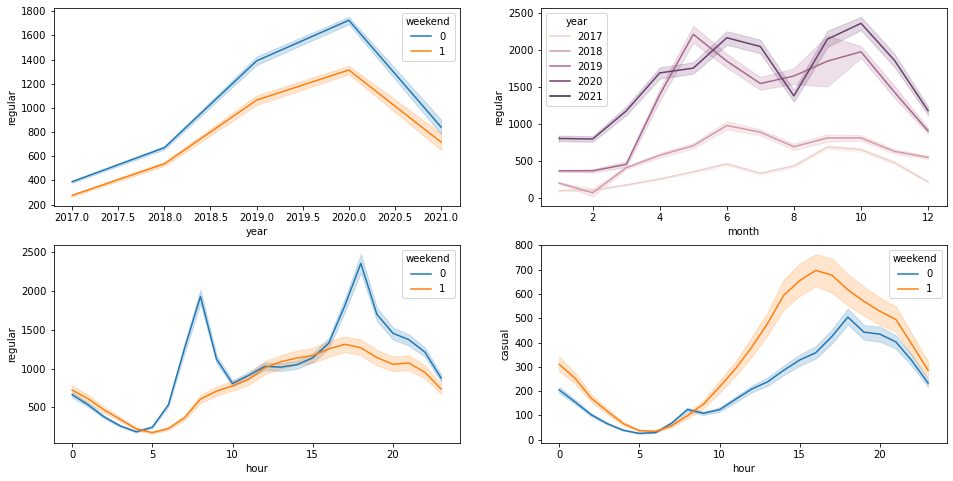

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# 정기권 고객의 연도별 이용량(평일/주말 구분)
sns.lineplot(data=df, x='year', y='regular', hue='weekend', ax=axes[0])

# 정기권 고객의 월별 이용량(연도 구분)
sns.lineplot(data=df, x='month', y='regular', hue='year', ax=axes[1])

# 정기권/일일권 고객의 시간대별 이용량(평일/주말 구분)
sns.lineplot(data=df, x='hour', y='regular', hue='weekend', ax=axes[2])
sns.lineplot(data=df, x='hour', y='casual', hue='weekend', ax=axes[3])

## Data Preparation
1. 이상치 탐지
 - MAD 방식
2. 스케일링(Scaling)
 - Robust 방식과 MinMax/Standard 방식의 차이
3. Feature selection
 - 유의미한/중요한 정보를 선별
 - 순열 중요도(Permutation Importance)

### (1) 이상치 탐지
- MAD(Median Absolute Deviation): 중앙값 절대 편차
 - 중앙값으로부터 떨어져 있는 정도를 확인
 - 공식을 적용한 값이 3.5 이상인 경우 이상치로 판단

#### 정기권 고객 이상치 확인

In [16]:
# 중앙값
med = np.median(df['regular'])
med

606.0

In [17]:
# 중앙값 절대 편차(중앙값으로부터의 편차의 절댓값)
med_dist = np.abs(df['regular'] - med)
med_dist

0        543.0
1        551.0
2        568.0
3        584.0
4        590.0
         ...  
32098    740.0
32099    692.0
32100    623.0
32101    144.0
32102    110.0
Name: regular, Length: 32103, dtype: float64

In [18]:
# 중앙값으로부터의 편차(med_dist)의 중앙값 -> MAD
MAD = np.median(med_dist)
MAD

441.0

In [19]:
# 공식 적용
modified = 0.6745 * med_dist / MAD
modified

# modified 값이 3.5 이상인 경우 이상치로 판단

0        0.830507
1        0.842743
2        0.868744
3        0.893215
4        0.902392
           ...   
32098    1.131814
32099    1.058399
32100    0.952865
32101    0.220245
32102    0.168243
Name: regular, Length: 32103, dtype: float64

In [20]:
df.loc[modified >= 3.5]

# 이상치로 판단된 데이터
# 이용량이 지나치게 높은 것을 확인 가능

,year,month,day,hour,dayofweek,windforce,discomfort,regular,casual,group,weekend
17245,2019,4,10,18,2,0,0,3068.0,375.0,8.0,0
17260,2019,4,11,8,3,0,0,3240.0,156.0,1.0,0
17270,2019,4,11,18,3,0,0,3586.0,667.0,12.0,0
17284,2019,4,12,8,4,0,0,3142.0,178.0,0.0,0
17285,2019,4,12,8,4,0,0,3142.0,178.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
31930,2021,1,25,8,0,0,0,2905.0,207.0,2.0,0
31939,2021,1,25,17,0,0,0,3149.0,1072.0,18.0,0
31940,2021,1,25,18,0,0,0,4042.0,1070.0,16.0,0
31984,2021,1,27,8,2,0,0,2901.0,189.0,0.0,0


### (2) Data Scaling
- 스케일링 작업이 필요한 경우
 - 알고리즘 속도의 차이가 발생하는 경우
 - 데이터의 값이 매우 큰 경우(작은 변동까지 통계량에 크게 반영되는 것을 방지)
 - 시각화가 용이하도록 0과 1 사이의 값으로 변환(MinMaxScaling)
- 스케일링 방식
 - MinMax: 이상치가 없다는 가정 하에 수행(가장 쉽지만 이상치의 영향을 가장 많이 받는 방식)
 - Standard
 - Robust: 중앙값을 0으로, IQR을 1로 변환
- 이상치의 영향을 받는 정도
 - MinMax > Standard > Robust

#### 기초통계량 변환
- 중앙값(Robust)
- 평균(Standard)

In [24]:
# 샘플 작업: 기초통계량 변환 원리 파악

df['regular_sample'] = df['regular'] + 1

cols = ['regular', 'regular_sample']
df[cols].describe()

# 모든 행에 1을 더하면 표준편차를 제외한 모든 통계량이 1만큼 증가

,regular,regular_sample
count,32103.000000,32103.000000
mean,975.419587,976.419587
std,1025.717240,1025.717240
min,0.000000,1.000000
25%,246.000000,247.000000
50%,606.000000,607.000000
75%,1353.500000,1354.500000
max,10196.000000,10197.000000


In [25]:
# 중앙값을 0으로 변환

df['regular_sample'] = df['regular'] - np.median(df['regular'])

cols = ['regular', 'regular_sample']
df[cols].describe()

# 중앙값만큼 좌측으로 shift(감소) -> 중앙값(50% 지점): 0

,regular,regular_sample
count,32103.000000,32103.000000
mean,975.419587,369.419587
std,1025.717240,1025.717240
min,0.000000,-606.000000
25%,246.000000,-360.000000
50%,606.000000,0.000000
75%,1353.500000,747.500000
max,10196.000000,9590.000000


In [26]:
# 평균을 0으로 변환 -> 평균만큼 좌측 이동

df['regular_sample'] = df['regular'] - np.mean(df['regular'])

cols = ['regular', 'regular_sample']
df[cols].describe()

,regular,regular_sample
count,32103.000000,3.210300e+04
mean,975.419587,-1.164326e-10
std,1025.717240,1.025717e+03
min,0.000000,-9.754196e+02
25%,246.000000,-7.294196e+02
50%,606.000000,-3.694196e+02
75%,1353.500000,3.780804e+02
max,10196.000000,9.220580e+03


#### Robust/Standard Scaling
- Robust
 - 중앙값을 0으로, IQR을 1로 변환
 - 이상치를 고려한 경우에 사용
- Standard
 - 평균을 0으로, 표준편차를 1로 변환
 - 해석력 우수

In [33]:
df['regular'].describe()

# IQR = 1353.5 - 246.0

count    32103.000000
mean       975.419587
std       1025.717240
min          0.000000
25%        246.000000
50%        606.000000
75%       1353.500000
max      10196.000000
Name: regular, dtype: float64

In [34]:
##### Robust Scaling #####

IQR = 1353.5 - 246.0

df['regular_rob'] = (df['regular'] - np.median(df['regular'])) / IQR
df['regular_rob'].describe()

# IQR = 0.674944 + 0.325056 = 1

count    32103.000000
mean         0.333562
std          0.926156
min         -0.547178
25%         -0.325056
50%          0.000000
75%          0.674944
max          8.659142
Name: regular_rob, dtype: float64

In [35]:
##### Standard Scaling #####

df['regular_std'] = (df['regular'] - np.mean(df['regular'])) / np.std(df['regular'])
df['regular_std'].describe()

# mean = -1.080782e-15 = 0
# std = 1.000016e+00 = 1

count    3.210300e+04
mean    -1.080782e-15
std      1.000016e+00
min     -9.509782e-01
25%     -7.111423e-01
50%     -3.601629e-01
75%      3.686068e-01
max      8.989538e+00
Name: regular_std, dtype: float64

In [91]:
cols = ['regular', 'regular_rob', 'regular_std']
df[cols].describe()

,regular,regular_rob,regular_std
count,32103.000000,32103.000000,3.210300e+04
mean,975.419587,0.333562,-1.080782e-15
std,1025.717240,0.926156,1.000016e+00
min,0.000000,-0.547178,-9.509782e-01
25%,246.000000,-0.325056,-7.111423e-01
50%,606.000000,0.000000,-3.601629e-01
75%,1353.500000,0.674944,3.686068e-01
max,10196.000000,8.659142,8.989538e+00


### (3) Feature Selection
- 선별 방식
 - Filter: 기초통계량 활용
 - Wrapper, Embed: 기계학습 활용
 - PI: 순열 중요도(Permutation Importance) 활용

### Permutation Importance(순열 중요도)
- 데이터가 저장된 순서의 중요도를 이용하여 변수 선택
- 데이터를 무작위로 섞은 후 원본 데이터와 평가지표 비교
 - 데이터(행)의 순서를 바꿨을 때 평가지표의 하락폭이 클수록 중요도가 높은 컬럼
- 접근 방식
 - MCR 접근법
 - PIMP 접근법

In [37]:
sample_df = pd.read_csv('test1_modified_6.csv')
sample_df.describe().columns

Index(['year', 'month', 'day', 'hour', 'dayofweek', 'windforce', 'discomfort',
       'regular', 'casual', 'group'],
      dtype='object')

### MCR 접근법
- 패키지/모듈
 - sklearn.inspection
 - permutation_importance
- 참고 자료
 - Fisher(2019), All Models are Wrong, but many are useful

#### MCR 프로세스
1. 필요한 요소
 - 학습이 완료된 모델 f
 - Feature 데이터셋 X
 - Label 데이터 y
2. f에 대해 f(X, y)를 적용하여 학습 및 평가지표 S 도출
3. X의 Feature 하나하나에 대해 아래 내용을 반복 수행
 - j번째 Feature를 무작위로 섞은 데이터 Xj 생성
 - (Xj, y) 모델 학습 및 평가지표 Sj 도출
 - k회 반복(ex: 5회 반복 시 Sj1, Sj2, Sj3, Sj4, Sj5 도출)
 - 모든 평가지표 Sjk의 평균값을 S와 비교

#### 결과 해석
- j번째 Feature의 순서를 섞으면 y와 Feature j 사이의 연결고리/패턴이 끊어지므로 정보 손실 발생
 - 정보가 손실된 정도를 평가지표의 하락으로 측정
- Sj와 S의 평가지표 점수 차이를 이용하여 j번째 Feature가 평가지표 하락에 기여한 정도를 파악
 - 하락한 정도가 크면 해당 Feature가 그만큼 중요하다고 판단

In [40]:
# 모델 f: 랜덤 포레스트 회귀 알고리즘
from sklearn.ensemble import RandomForestRegressor as rf

# feature, label 지정
label = 'regular' # 정기권 고객
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

X, y = sample_df[features], sample_df[label] # X, y
model = rf() # 모델 객체 생성
model.fit(X, y) # 모델 학습
model.score(X, y) # 평가지표 S

0.9868023623102194

In [ ]:
# 1) hour 컬럼 shuffle

# feature, label 재설정 -> 컬럼 원래대로 복구
label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

shuffle = sample_df['hour']
np.random.shuffle(shuffle)

sample_df['hour'] = shuffle
sample_df.head()

# shuffle 안되는 경우 numpy 버전 다운그레이드 시도
# 1.20.3 버전에서 정상 작동 확인

In [ ]:
X, y = sample_df[features], sample_df[label]
model = rf()
model.fit(X, y)
model.score(X, y)

# 0.9868 -> (...) 점수 하락
# hour 변수가 중요하다면 패턴(순서)이 망가졌을 때 중요한 정보가 손실된다고 판단

# 중요하다고 판단되는 모든 컬럼에 대하여 진행
# 중요한 정보가 포함된 컬럼(feature)은 점수의 하락폭이 높을 것이고,
# 덜 중요한 정보가 포함된 컬럼은 점수의 하락폭이 낮을 것

In [ ]:
# 2) year 컬럼 shuffle

label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

shuffle = sample_df['year']
np.random.shuffle(shuffle)

sample_df['year'] = shuffle
sample_df.head()

X, y = sample_df[features], sample_df[label]
model = rf()
model.fit(X, y)
model.score(X, y)

#### 모듈 사용

In [41]:
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.inspection import permutation_importance as pi

df = pd.read_csv('test1_modified_6.csv')

In [42]:
label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

X, y = df[features], df[label]
model = rf()
model.fit(X, y)

RandomForestRegressor()

In [43]:
result = pi(model, X, y)
result

# 평가지표 활용 -> importances

{'importances_mean': array([0.95624684, 0.66338248, 0.23484767, 0.84856353, 0.2371568 ,
        0.0065305 , 0.03426904]),
 'importances_std': array([0.00564805, 0.00844349, 0.00418819, 0.00827515, 0.00334377,
        0.00024482, 0.00163724]),
 'importances': array([[0.96515818, 0.95405491, 0.95108858, 0.95059494, 0.96033756],
        [0.65498518, 0.66274302, 0.65638568, 0.6787493 , 0.66404923],
        [0.24251361, 0.23237191, 0.23606341, 0.23228205, 0.23100735],
        [0.85098908, 0.86292257, 0.83804156, 0.84546972, 0.8453947 ],
        [0.24188067, 0.23626918, 0.23794293, 0.23156689, 0.23812434],
        [0.00682379, 0.00613957, 0.00666463, 0.00636702, 0.00665748],
        [0.0332321 , 0.03529175, 0.03680514, 0.03209436, 0.03392184]])}

In [44]:
pd.DataFrame(result['importances'])

# 컬럼명은 반복 횟수(k): 정확도를 높이기 위해 자체적으로 반복 수행(default: 5)
# 행 인덱스는 각각의 feature -> 어떤 컬럼인지 명시 필요

,0,1,2,3,4
0,0.965158,0.954055,0.951089,0.950595,0.960338
1,0.654985,0.662743,0.656386,0.678749,0.664049
2,0.242514,0.232372,0.236063,0.232282,0.231007
3,0.850989,0.862923,0.838042,0.845470,0.845395
4,0.241881,0.236269,0.237943,0.231567,0.238124
5,0.006824,0.006140,0.006665,0.006367,0.006657
6,0.033232,0.035292,0.036805,0.032094,0.033922


In [45]:
# 데이터프레임 transpose 후 컬럼명(features) 추가
perf_df = pd.DataFrame(result['importances']).T
perf_df.columns = features
perf_df

# 모든 feature를 5번씩 섞어서 점수 하락폭의 차이를 확인
# 일반적으로 값들의 평균으로 중요도를 판단

# year, hour 컬럼의 순열 중요도(평가점수 하락폭)가 큼 -> 값이 클수록 중요한 정보

,year,month,day,hour,dayofweek,windforce,discomfort
0,0.965158,0.654985,0.242514,0.850989,0.241881,0.006824,0.033232
1,0.954055,0.662743,0.232372,0.862923,0.236269,0.006140,0.035292
2,0.951089,0.656386,0.236063,0.838042,0.237943,0.006665,0.036805
3,0.950595,0.678749,0.232282,0.845470,0.231567,0.006367,0.032094
4,0.960338,0.664049,0.231007,0.845395,0.238124,0.006657,0.033922


#### 순열 중요도 시각화
- PI의 평균값이 좌표 상에서 (0, 0)으로부터 얼마나 멀리 떨어져 있는지 확인
 - 원점으로부터의 거리가 멀수록 중요도가 높은 컬럼(feature)
 - x축: mean
 - y축: std(평균으로부터 떨어진 거리)

In [46]:
perf_df.describe()

,year,month,day,hour,dayofweek,windforce,discomfort
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.956247,0.663382,0.234848,0.848564,0.237157,0.006530,0.034269
std,0.006315,0.009440,0.004683,0.009252,0.003738,0.000274,0.001830
min,0.950595,0.654985,0.231007,0.838042,0.231567,0.006140,0.032094
25%,0.951089,0.656386,0.232282,0.845395,0.236269,0.006367,0.033232
50%,0.954055,0.662743,0.232372,0.845470,0.237943,0.006657,0.033922
75%,0.960338,0.664049,0.236063,0.850989,0.238124,0.006665,0.035292
max,0.965158,0.678749,0.242514,0.862923,0.241881,0.006824,0.036805


In [47]:
selected = ['mean', 'std']
for_plot = perf_df.describe().T[selected].reset_index()
for_plot

,index,mean,std
0,year,0.956247,0.006315
1,month,0.663382,0.009440
2,day,0.234848,0.004683
3,hour,0.848564,0.009252
4,dayofweek,0.237157,0.003738
5,windforce,0.006530,0.000274
6,discomfort,0.034269,0.001830


<AxesSubplot:xlabel='mean', ylabel='std'>

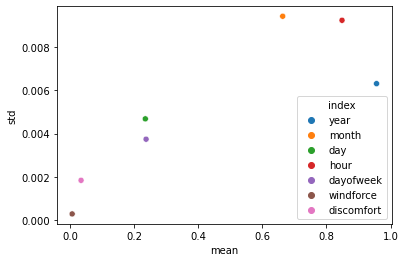

In [48]:
sns.scatterplot(data=for_plot, x='mean', y='std', hue='index')

### PIMP 접근법
- 참고 자료
 - A Altmann(2010), Permutation Importance
- Embed 방식에서의 변수 중요도 정보를 응용
 - RandomForest 알고리즘의 feature_importances_ 속성
- 알고리즘 학습 시 변수의 중요도 파악 가능
 - 변수 중요도 제공 모델: 트리 계열(RandomForest), L1 규제 모델
- MCR이 평가지표로 판단했다면, PIMP는 변수 중요도 활용

#### PIMP 프로세스
1. 원본 데이터셋 X, y에 대해 모델을 학습한 변수 중요도 P 산출
2. y의 순서를 섞은 데이터 yj 생성
 - 틀린 정답지 yj를 가지고 학습하여 틀린/무의미한 결과 도출
 - 무의미한 수치의 분포를 생성, 이 분포와 멀리 떨어져 있는 데이터는 의미가 있다고 판단
3. (X, yj)에 대하여 모델을 학습한 변수 중요도 Pj 산출
4. 2, 3번 단계를 n회 반복 수행
 - 정규분포를 형성하기 위해 n회 반복 수행
 - 랜덤 프로세스이므로 n개의 Pj에 대하여 정규분포를 이룰 것
5. P가 Pj의 정규분포상 평균으로부터 몇 표준편차 떨어져 있는지(표준편차로 나누기) 파악
 - Pj는 모든 feature와의 연결고리 패턴이 사라진 의미 없는 값(null-importance; 무의미한 중요도)
 - 원본 변수 중요도가 얼마나 의미 있는지 확인: 의미 없는 분포로부터 의미 있는 값이 얼마나 발생하기 어려운 상황인지 파악

In [2]:
from sklearn.ensemble import RandomForestRegressor as rf

df = pd.read_csv('test1_modified_6.csv')

In [3]:
label = 'regular'
features = ['year', 'month', 'day', 'hour',
            'dayofweek', 'windforce', 'discomfort']

X, y = df[features], df[label]
model = rf()
model.fit(X, y)
model.feature_importances_

array([0.26811239, 0.23895291, 0.10376427, 0.30225384, 0.06934403,
       0.00520467, 0.01236789])

In [4]:
# 1) 변수 중요도 P 산출

fi = pd.DataFrame()

fi['importance'] = model.feature_importances_
fi['feature'] = features
fi

,importance,feature
0,0.268112,year
1,0.238953,month
2,0.103764,day
3,0.302254,hour
4,0.069344,dayofweek
5,0.005205,windforce
6,0.012368,discomfort


In [5]:
# 2) 틀린 정답지 yj 생성

yj = pd.read_csv('test1_modified_6.csv')[label]
np.random.shuffle(yj)

C:\Users\김시원\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3398: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# 3) yj에 대한 변수 중요도 Pj 산출(무의미한 중요도)

model = rf()
model.fit(X, yj)
model.feature_importances_

array([0.10587615, 0.14135923, 0.2415113 , 0.33889694, 0.14488689,
       0.00500234, 0.02246715])

In [7]:
# 경고 메시지를 무시하고 숨기기 위한 모듈(shuffle 시 발생)
import warnings
warnings.simplefilter(action='ignore')

In [8]:
# 4) 반복 수행

yj = pd.read_csv('test1_modified_6.csv')[label]

null_imp = pd.DataFrame()

for i in range(10):
    np.random.shuffle(yj)
    model = rf()
    model.fit(X, yj)
    model.feature_importances_
    null_imp[str(i + 1) + '_shuffle'] = model.feature_importances_

null_imp

,1_shuffle,2_shuffle,3_shuffle,4_shuffle,5_shuffle,6_shuffle,7_shuffle,8_shuffle,9_shuffle,10_shuffle
0,0.095618,0.091666,0.090764,0.102830,0.101889,0.092281,0.104925,0.101358,0.101624,0.104022
1,0.145493,0.132112,0.146223,0.130487,0.148420,0.148145,0.141839,0.139532,0.126348,0.135893
2,0.229726,0.242423,0.228819,0.233863,0.232258,0.214513,0.223465,0.209547,0.233213,0.238651
3,0.383258,0.359068,0.359443,0.371780,0.345064,0.376545,0.371143,0.373244,0.385002,0.347179
4,0.118193,0.149720,0.146222,0.139162,0.147410,0.140538,0.133898,0.148855,0.128688,0.147362
5,0.004265,0.005356,0.004426,0.004471,0.005089,0.004585,0.004884,0.004247,0.004767,0.005334
6,0.023448,0.019654,0.024103,0.017406,0.019871,0.023392,0.019845,0.023217,0.020357,0.021558


In [9]:
null_imp = null_imp.T
null_imp.columns = features
null_imp

# null_imp 내의 값들은 모두 무의미한 수치 -> 정규분포를 형성

,year,month,day,hour,dayofweek,windforce,discomfort
1_shuffle,0.095618,0.145493,0.229726,0.383258,0.118193,0.004265,0.023448
2_shuffle,0.091666,0.132112,0.242423,0.359068,0.149720,0.005356,0.019654
3_shuffle,0.090764,0.146223,0.228819,0.359443,0.146222,0.004426,0.024103
4_shuffle,0.102830,0.130487,0.233863,0.371780,0.139162,0.004471,0.017406
5_shuffle,0.101889,0.148420,0.232258,0.345064,0.147410,0.005089,0.019871
6_shuffle,0.092281,0.148145,0.214513,0.376545,0.140538,0.004585,0.023392
7_shuffle,0.104925,0.141839,0.223465,0.371143,0.133898,0.004884,0.019845
8_shuffle,0.101358,0.139532,0.209547,0.373244,0.148855,0.004247,0.023217
9_shuffle,0.101624,0.126348,0.233213,0.385002,0.128688,0.004767,0.020357
10_shuffle,0.104022,0.135893,0.238651,0.347179,0.147362,0.005334,0.021558


<AxesSubplot:>

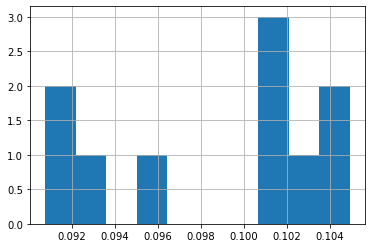

In [10]:
null_imp['year'].hist()

# 시간 관계상 10회만 수행했으므로 데이터가 많지 않아 정규분포 형태 x
# 반복 횟수가 늘어나면 정규분포를 이룰 것
# 횟수를 정해줄 수도 있지만, 일반적으로 30분 이상 반복을 수행하면 정규분포 형성 가능

In [12]:
null_imp.describe()

,year,month,day,hour,dayofweek,windforce,discomfort
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.098698,0.139449,0.228648,0.367173,0.140005,0.004743,0.021285
std,0.005508,0.007907,0.010239,0.013953,0.010341,0.000414,0.002199
min,0.090764,0.126348,0.209547,0.345064,0.118193,0.004247,0.017406
25%,0.093115,0.133057,0.224804,0.359162,0.135214,0.004437,0.019852
50%,0.101491,0.140686,0.230992,0.371461,0.143380,0.004676,0.020958
75%,0.102595,0.146040,0.233701,0.375720,0.147398,0.005038,0.023348
max,0.104925,0.148420,0.242423,0.385002,0.149720,0.005356,0.024103


In [14]:
# 5) P가 Pj의 정규분포상 평균으로부터 얼마나 떨어져 있는지 파악

selected = ['mean', 'std']
nulls = null_imp.describe().T[selected].reset_index()

# 원본 변수 중요도 컬럼 추가
nulls['P'] = fi['importance']

# P가 평균으로부터 몇 표준편차만큼 떨어져 있는지 확인(표준편차로 나누기)
nulls['P_dist'] = (nulls['P'] - nulls['mean']) / nulls['std']
nulls

# P_dist가 크면 클수록 중요한 정보라고 판단(year, month)

,index,mean,std,P,P_dist
0,year,0.098698,0.005508,0.268112,30.756783
1,month,0.139449,0.007907,0.238953,12.584629
2,day,0.228648,0.010239,0.103764,-12.196499
3,hour,0.367173,0.013953,0.302254,-4.652559
4,dayofweek,0.140005,0.010341,0.069344,-6.832972
5,windforce,0.004743,0.000414,0.005205,1.117442
6,discomfort,0.021285,0.002199,0.012368,-4.055971


In [15]:
# hour의 경우 MCR 접근법에서는 중요도가 높았지만,
# PIMP 접근법의 결과 크게 중요한 정보로 판단되지 x

# 1) PIMP 반복 횟수가 많지 않으므로 일반화 불가능
# 2) 변수 선택 기법에 따라 결과가 다를 수 있으므로 여러 통계치를 기반으로 적절한 판단 필요